In [213]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

np.random.seed(1)

In [214]:
#let's make our toy dataset

mu = [3,3] #we deliberately take the mean non-zero to show you the step making the mean zero
sigma = [[7, 5],[5, 7]] # must be positive semi-definite. this is basically the covariance matrix. as we can see the covariance between the 2 variables is positive...
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T 


In [215]:
set1 = np.argsort(np.linalg.norm(x - 3, axis=0))[-20:] 
set2 = list(set(range(n)) - set(set1))

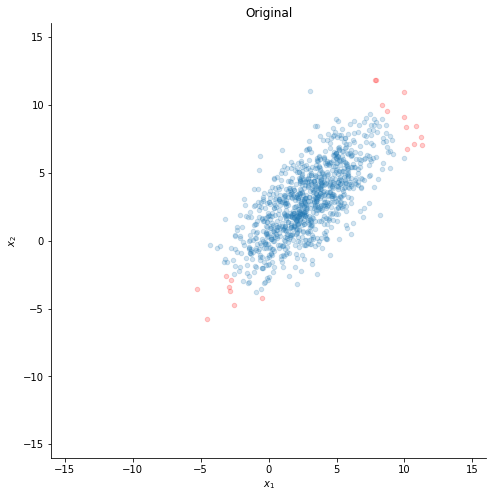

In [216]:
def plotting(x, xlim = 16, ylim = 16, title="Original"):
    fig, ax = plt.subplots()
    ax.scatter(x[0, set1], x[1, set1], s=20, c="red", alpha=0.2)
    ax.scatter(x[0, set2], x[1, set2], s=20, alpha=0.2)
    ax.set_aspect("equal")
    ax.set_xlim(-xlim, xlim)
    ax.set_ylim(-ylim, ylim)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(title)
        
plotting(x)

In [217]:
#Step 1 : make the mean zero
#m = 1000 here
mu = np.sum(x, axis=1, dtype = np.float32)/1000
for i in range(1000):
    x[:,i] -= mu 


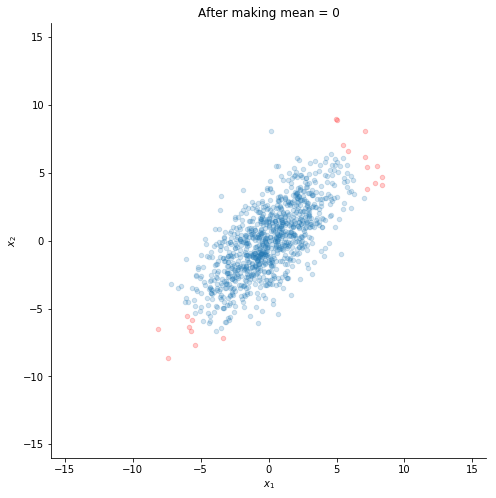

In [218]:
plotting(x, title="After making mean = 0")

In [219]:
#Step 2 : unit variance

for j in range(x.shape[0]):
    var = np.sum(np.square(x[j,:]), dtype = np.float32)/1000
    for i in range(1000):
        x[j,i] /=  np.sqrt(var)

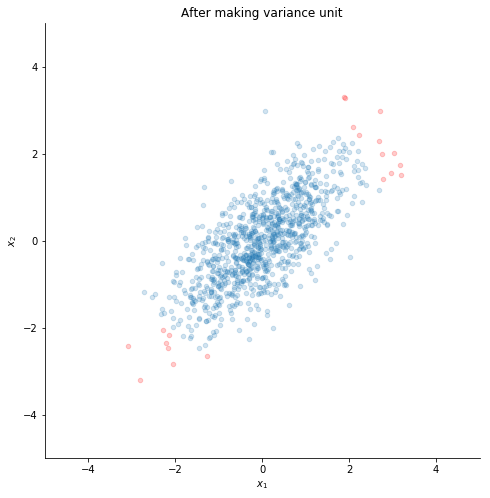

In [220]:
plotting(x, 5, 5, title = "After making variance unit")

In [221]:
#Step 3 : Normaliation in case of image data
'''
n = x.shape[0]

mu = np.sum(x, axis=0,  dtype = np.float32)/n
print (mu.shape)
for i in range(n):
    x[i,:] -=  mu
'''

'\nn = x.shape[0]\n\nmu = np.sum(x, axis=0,  dtype = np.float32)/n\nprint (mu.shape)\nfor i in range(n):\n    x[i,:] -=  mu\n'

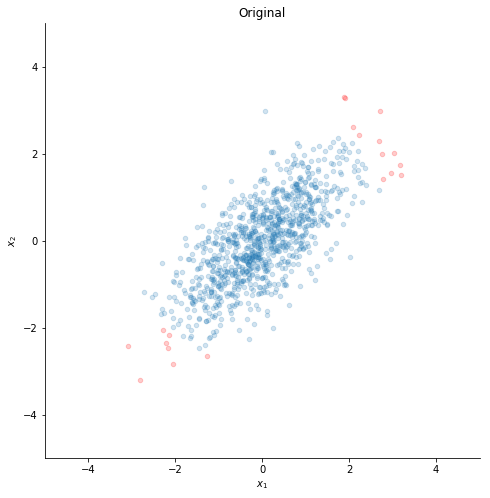

In [222]:
plotting(x, 5, 5)

In [223]:
#Step 4 : find the covariance matrix and it's eigen value and their corresponding vectors 
cov_mat = np.cov(x, rowvar=True)
Lambda, U = np.linalg.eigh(cov_mat)
#lambda is a 1-D array containing the lambda of cov_mat
#U is a 2D square array of corresponding eigen vectors (in columns)

In [224]:
#Step 5 : decide the value of k. Percentage variance to be retained = a percent (say)
# (not required here cuz we have only 2 variables)
'''
k = 0
percent = 0
s = np.sum(Lambda)
for i in range(Lambda.shape[0]):
    percent = np.sum(Lambda[0:i])/s
    k++
    if (percent >= (a/100)):
        break
    end
'''

'\nk = 0\npercent = 0\ns = np.sum(Lambda)\nfor i in range(Lambda.shape[0]):\n    percent = np.sum(Lambda[0:i])/s\n    k++\n    if (percent >= (a/100)):\n        break\n    end\n'

In [225]:
#for the purpose of illustration let us whiten the data and apply PCA without reducing the number of features

#Step : 6 Whiten the data
y = U.T @ x
z = np.diag(Lambda**(-1/2)) @ y

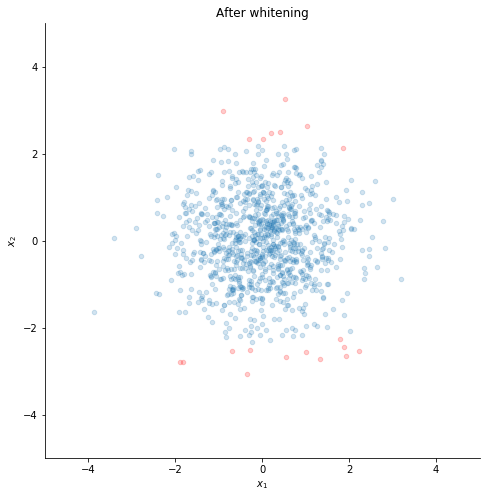

In [226]:
plotting(z, 5, 5, title="After whitening")

In [227]:
#Now let us take k = 1 and plot the new data
k = 1
y = U[:,0:k].T @ x
z = np.diag(Lambda[0:k]**(-1/2)) @ y

Text(0.5,1,'Transformed data')

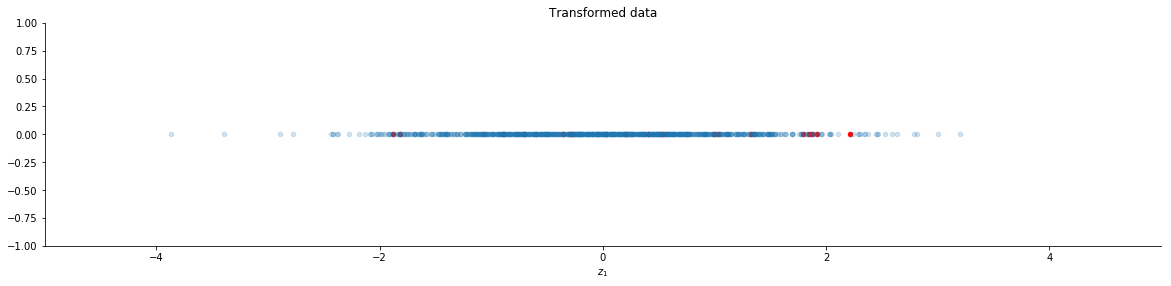

In [228]:
y = np.zeros((1,1000))
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()
ax.scatter(z[0, set1], y[0, set1], s=20, c="red", alpha=1)
ax.scatter(z[0, set2], y[0, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel("$z_1$")
#ax.set_ylabel("$x_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Transformed data")

In [229]:
mu = [3,3] #we deliberately take the mean non-zero to show you the step making the mean zero
sigma = [[7, 5],[5, 7]] # must be positive semi-definite. this is basically the covariance matrix. as we can see the covariance between the 2 variables is positive...
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T 

In [230]:

from sklearn.decomposition import PCA
k = 1
pca = PCA(n_components = k, whiten = True)
z = pca.fit_transform(x.T).T

In [231]:
z.shape

(1, 1000)

Text(0.5,1,'Transformed data')

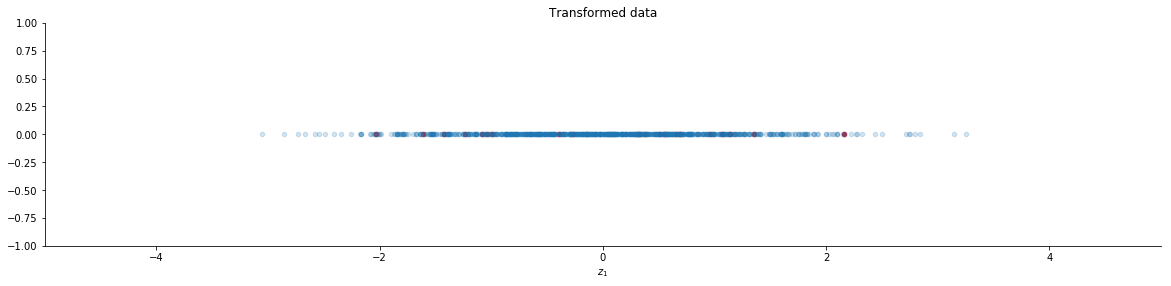

In [232]:
y = np.zeros((1,1000))
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()
ax.scatter(z[0, set1], y[0, set1], s=20, c="red", alpha=1)
ax.scatter(z[0, set2], y[0, set2], s=20, alpha=0.2)
ax.set_aspect("equal")
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel("$z_1$")
#ax.set_ylabel("$x_2$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Transformed data")